In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
from keras.layers import *
from keras.models import Model

def build_model():
  x = Input(shape=(64, 64, 3))
  out = x

  out = Flatten()(out)
  out = Dense(512, activation='relu')(out)
  out = Dense(256, activation='relu')(out)
  out = Dense(64, activation='relu')(out)
  out = Dense(1, activation='sigmoid')(out)

  model = Model(x, out)
  return model

In [4]:
model = build_model()
# input_shape = (64, 64, 3)
# model = keras.Sequential()
# model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), padding="same", 
#                  activation='relu',
#                  input_shape=input_shape))
# model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(keras.layers.Dropout(0.25))
# model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(keras.layers.Dropout(0.25))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(256, activation='relu'))
# model.add(keras.layers.Dropout(0.5))
# model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 12288)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               6291968   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 6,439,809
Trainable params: 6,439,809
Non-trainable params: 0
___________________________________________________

In [5]:
from keras.preprocessing.image import ImageDataGenerator

In [6]:
Generator = ImageDataGenerator(rescale=1/255.)

In [7]:
train_gen = Generator.flow_from_directory('./train', target_size=(64,64),
                                          batch_size=32,
                                          class_mode='binary')

val_gen = Generator.flow_from_directory('./validation', target_size=(64,64),
                                          batch_size=32,
                                          class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
epochs = 20
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_gen, 
                    epochs=epochs, 
                    validation_data=val_gen)

Epoch 1/20
63/63 [==============================] - 8s 106ms/step - loss: 1.1235 - accuracy: 0.4940 - val_loss: 0.8363 - val_accuracy: 0.5100
Epoch 2/20
63/63 [==============================] - 6s 102ms/step - loss: 0.7388 - accuracy: 0.5410 - val_loss: 0.6987 - val_accuracy: 0.5200
Epoch 3/20
63/63 [==============================] - 6s 102ms/step - loss: 0.7146 - accuracy: 0.5560 - val_loss: 0.7008 - val_accuracy: 0.5170
Epoch 4/20
63/63 [==============================] - 6s 101ms/step - loss: 0.6682 - accuracy: 0.5895 - val_loss: 0.6832 - val_accuracy: 0.5830
Epoch 5/20
63/63 [==============================] - 6s 102ms/step - loss: 0.6620 - accuracy: 0.5950 - val_loss: 0.7376 - val_accuracy: 0.5220
Epoch 6/20
63/63 [==============================] - 6s 102ms/step - loss: 0.6625 - accuracy: 0.6025 - val_loss: 0.6692 - val_accuracy: 0.5890
Epoch 7/20
63/63 [==============================] - 6s 101ms/step - loss: 0.6695 - accuracy: 0.6000 - val_loss: 0.7283 - val_accuracy: 0.5530
Epoch 

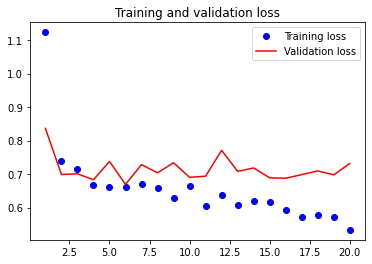

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
test_gen = Generator.flow_from_directory ('./test', target_size=(64,64),
                                          batch_size=32,
                                          class_mode='binary')

Found 1000 images belonging to 2 classes.


In [11]:
score = model.evaluate(test_gen, verbose=0)
print(f'Test loss: {score[0]:.3f}')
print(f'Test accuracy: {score[1]:.3f}')

Test loss: 0.726
Test accuracy: 0.590


In [14]:
import numpy as np

x_tests, y_tests = [], []
for i in range(len(test_gen)):
  x_test, y_test = next(test_gen)
  x_tests.append(x_test)
  y_tests.append(y_test)

x_test = np.concatenate(x_tests, axis=0)
y_test = np.concatenate(y_tests, axis=0)

print(x_test.shape)
print(y_test.shape)

(1000, 64, 64, 3)
(1000,)


c:\users\parksangun\anaconda3\envs\tf\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


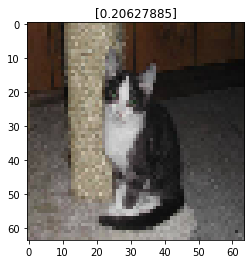

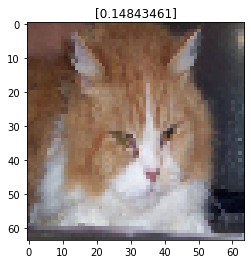

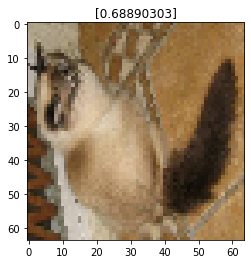

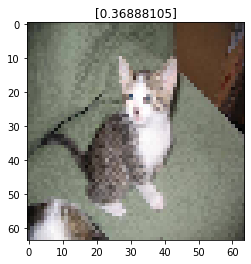

In [15]:
pred = model.predict(x_test[:4])

for i in range(4):
   plt.imshow(x_test[i])
   plt.title(pred[i])
   plt.show()

In [16]:
train_gen.class_indices

{'cats': 0, 'dogs': 1}

# CNN

In [27]:
input_shape = (64, 64, 3)
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), padding="same", 
                 activation='relu',
                 input_shape=input_shape))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 14400)            

In [28]:
from keras.preprocessing.image import ImageDataGenerator

In [29]:
Generator = ImageDataGenerator(rescale=1/255.)

In [30]:
train_gen = Generator.flow_from_directory('./train', target_size=(64,64),
                                          batch_size=32,
                                          class_mode='binary')

val_gen = Generator.flow_from_directory('./validation', target_size=(64,64),
                                          batch_size=32,
                                          class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [31]:
epochs = 10
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_gen, 
                    epochs=epochs, 
                    validation_data=val_gen)

Epoch 1/10
63/63 [==============================] - 7s 106ms/step - loss: 0.7550 - accuracy: 0.4965 - val_loss: 0.6926 - val_accuracy: 0.5150
Epoch 2/10
63/63 [==============================] - 6s 102ms/step - loss: 0.6914 - accuracy: 0.5340 - val_loss: 0.6921 - val_accuracy: 0.5280
Epoch 3/10
63/63 [==============================] - 6s 101ms/step - loss: 0.6680 - accuracy: 0.5940 - val_loss: 0.6521 - val_accuracy: 0.6370
Epoch 4/10
63/63 [==============================] - 6s 102ms/step - loss: 0.6279 - accuracy: 0.6540 - val_loss: 0.6448 - val_accuracy: 0.6470
Epoch 5/10
63/63 [==============================] - 7s 110ms/step - loss: 0.5679 - accuracy: 0.7145 - val_loss: 0.6268 - val_accuracy: 0.6520
Epoch 6/10
63/63 [==============================] - 7s 108ms/step - loss: 0.5213 - accuracy: 0.7280 - val_loss: 0.6152 - val_accuracy: 0.6720
Epoch 7/10
63/63 [==============================] - 6s 101ms/step - loss: 0.5151 - accuracy: 0.7440 - val_loss: 0.6069 - val_accuracy: 0.6680
Epoch 

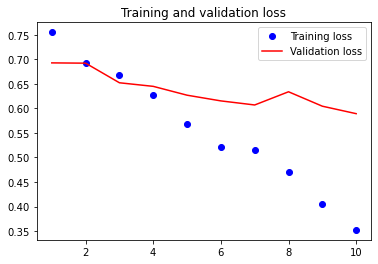

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [33]:
test_gen = Generator.flow_from_directory ('./test', target_size=(64,64),
                                          batch_size=32,
                                          class_mode='binary')

Found 1000 images belonging to 2 classes.


In [34]:
score = model.evaluate(test_gen, verbose=0)
print(f'Test loss: {score[0]:.3f}')
print(f'Test accuracy: {score[1]:.3f}')

Test loss: 0.592
Test accuracy: 0.722


In [35]:
import numpy as np

x_tests, y_tests = [], []
for i in range(len(test_gen)):
  x_test, y_test = next(test_gen)
  x_tests.append(x_test)
  y_tests.append(y_test)

x_test = np.concatenate(x_tests, axis=0)
y_test = np.concatenate(y_tests, axis=0)

print(x_test.shape)
print(y_test.shape)

(1000, 64, 64, 3)
(1000,)


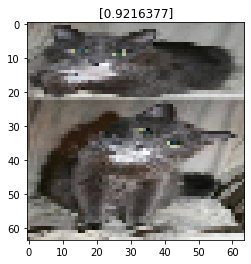

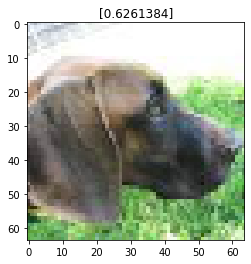

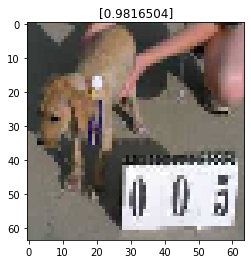

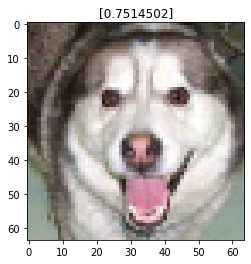

In [36]:
pred = model.predict(x_test[:4])

for i in range(4):
   plt.imshow(x_test[i])
   plt.title(pred[i])
   plt.show()